## 0. Download dataset

In [1]:
!gdown --id 1kc6XNqHZJg27KeBuoAoYj70_1rT92191

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1kc6XNqHZJg27KeBuoAoYj70_1rT92191
From (redirected): https://drive.google.com/uc?id=1kc6XNqHZJg27KeBuoAoYj70_1rT92191&confirm=t&uuid=9a86f346-0322-48fd-8689-8105aadd0b71
To: /content/vqa_coco_dataset.zip
100% 196M/196M [00:05<00:00, 34.8MB/s]


In [2]:
!unzip -q vqa_coco_dataset.zip

## 1. Import library

In [3]:
!pip install git+https://github.com/huggingface/transformers.git
!pip install bitsandbytes==0.45.0
!pip install accelerate==1.2.1

  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-yke94x3i
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-yke94x3i
  Resolved https://github.com/huggingface/transformers.git to commit 31bb662db19355e56b3125ab5c48b780ec13111c
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.50.0.dev0-py3-none-any.whl size=10772988 sha256=380ade6dbe2a83f0718c64be92af559674236a82321b4e1c4441e68b310721b8
  Stored in directory: /tmp/pip-ephem-wheel-cache-zf6yoqep/wheels/32/4b/78/f195c684dd3a9ed21f3b39fe8f85b48df7918581b6437be143
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.48.3
    Uninstalling transformers-4.48.3:
      Successfully uninstalled transformers-4.48.3
   ━━━━━━━━━━━━━━━━━━━━━━━━

In [4]:
import torch
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from transformers import LlavaForConditionalGeneration
from transformers import AutoProcessor
from transformers import BitsAndBytesConfig
from transformers import GenerationConfig
from PIL import Image

## 2. Dataset

In [5]:
def making_dataset(dataset_path, data):
  with open(dataset_path, 'r') as f:
    lines = f.readlines()
    for line in lines:

      temp = line.split('\t')
      qa = temp[1].split('?')

      if len(qa) == 3:
        answer = qa[2].strip()
      elif len(qa) == 2:
        answer = qa[1].strip()

      data_sample = {
            'image_path': temp[0][:-2],
            'question': qa[0] + '?',
            'answer': answer
        }

      data.append(data_sample)

  return data

In [6]:
train_data = []
val_data = []
test_data = []

train_set_path = "/content/vaq2.0.TrainImages.txt"
val_set_path = "/content/vaq2.0.DevImages.txt"
test_set_path = "/content/vaq2.0.TestImages.txt"


train_data = making_dataset(train_set_path, train_data)
val_data = making_dataset(val_set_path, val_data)
test_data = making_dataset(test_set_path, test_data)



## 3. Create VQA model

In [7]:
quantization_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16
)

model_id = "llava-hf/llava-1.5-7b-hf"
device = 'cuda' if torch.cuda.is_available() else 'cpu'
processor = AutoProcessor.from_pretrained(model_id)
model = LlavaForConditionalGeneration.from_pretrained(model_id,
                                                      quantization_config=quantization_config,
                                                      device_map=device)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


processor_config.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/701 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/505 [00:00<?, ?B/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.48, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


tokenizer_config.json:   0%|          | 0.00/1.45k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.62M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/41.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/552 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/950 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/70.1k [00:00<?, ?B/s]

model-00001-of-00003.safetensors:   0%|          | 0.00/4.99G [00:00<?, ?B/s]

model-00002-of-00003.safetensors:   0%|          | 0.00/4.96G [00:00<?, ?B/s]

model-00003-of-00003.safetensors:   0%|          | 0.00/4.18G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/3 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/141 [00:00<?, ?B/s]

In [8]:
model.generation_config

GenerationConfig {
  "bos_token_id": 1,
  "eos_token_id": 2,
  "pad_token_id": 32001
}

## 4. Making prompt

In [9]:
def create_prompt(question):
    prompt = f"""### INSTRUCTION:
Your task is to answer the question based on the given image. You can only answer 'yes' or 'no'.
### USER: <image>
{question}
### ASSISTANT:"""
    return prompt

## 5. Inference

In [10]:
generation_config = GenerationConfig(
    max_new_tokens=10,
    do_sample=True,
    temperature=0.1,
    top_p=0.95,
    top_k=50,
    eos_token_id=model.config.eos_token_id,
    pad_token=model.config.pad_token_id,
)

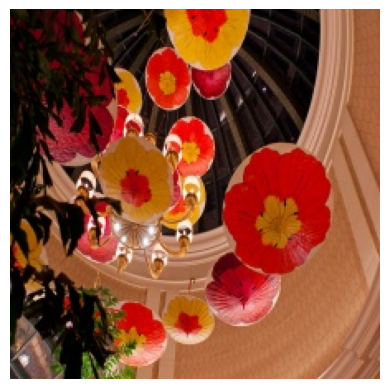

Question: Is this a big building ?
Label: yes
Prediction:  Yes


In [13]:
idx = 3
question = test_data[idx]['question']
image_name = test_data[idx]['image_path']
image_path = os.path.join('val2014-resised', image_name)
label = test_data[idx]['answer']
image = Image.open(image_path)

prompt = create_prompt(question)
inputs = processor(image,
                   prompt,
                   padding=True,
                   return_tensors="pt").to(device)

output = model.generate(**inputs,
                        generation_config=generation_config)
generated_text = processor.decode(output[0],
                                  skip_special_tokens=True)

plt.imshow(image)
plt.axis("off")
plt.show()
print(f"Question: {question}")
print(f"Label: {label}")
print(f"Prediction: {generated_text.split('### ASSISTANT:')[-1]}")